### EL5206-1: Laboratorio de Inteligencia Computacional y Robótica
## Laboratorio 3: Procesamiento de Imágenes

Integrantes:

*   Leslie Cárdenas
*   Matías Guzmán

# Introducción

Este laboratorio tiene como objetivo desarrollar algoritmos simples de detección de movimiento y tracking de objetos, para posteriormente analizar su funcionamiento y construcción. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Parte 1

Detección de movimiento con diferencia de frames y modelo de fondo

### Item 1

Se crea la función encargada de detectar movimientos, en donde se aplica una substracción entre dos imágenes.

In [2]:
def mov_det(img1, img2):
    resultado = cv2.subtract(img1,img2)
    return resultado

Se cargan las imágenes de las carpetas `seq1`, `seq2` y `seq3`. Al mismo tiempo, se transforman a escala de grises y se operan con la imágen siguiente, por último, se guardan en una lista, de tal forma que la imágen de la posición `det_1[0]` corresponderá a la substracción entre la segunda imágen y la primera.

In [3]:
det_1 = []
for k in range(1,500):
    path1 = str(k).zfill(4)
    path2 = str(k + 1).zfill(4)

    img1 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path1}.jpg", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path2}.jpg", cv2.IMREAD_GRAYSCALE)
    sub = mov_det(img1,img2)
    det_1.append(sub)

det_2 = []
for k in range(1,400):
    path1 = str(k).zfill(4)
    path2 = str(k + 1).zfill(4)

    img1 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path1}.jpg", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path2}.jpg", cv2.IMREAD_GRAYSCALE)
    sub = mov_det(img1,img2)
    det_2.append(sub)

det_3 = []
for k in range(1,175):
    path1 = str(k).zfill(4)
    path2 = str(k + 1).zfill(4)

    img1 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path1}.jpg", cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path2}.jpg", cv2.IMREAD_GRAYSCALE)
    sub = mov_det(img1,img2)
    det_3.append(sub)


[]

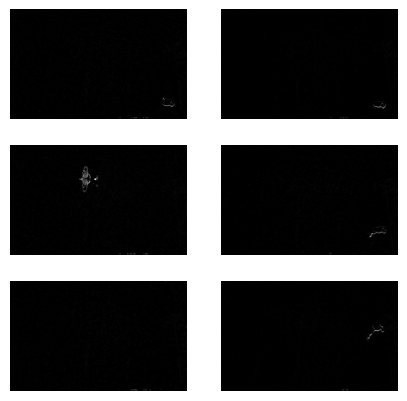

In [4]:
fig, axs = plt.subplots(3, 2, figsize =(5, 5))
axs[0, 0].imshow(det_1[253], cmap="gray")
axs[0, 0].axis("off")
axs[0, 1].imshow(det_1[256], cmap="gray")
axs[0, 1].axis("off")

axs[1, 0].imshow(det_2[13], cmap="gray")
axs[1, 0].axis("off")
axs[1, 1].imshow(det_2[240], cmap="gray")
axs[1, 1].axis("off")

axs[2, 0].imshow(det_3[5], cmap="gray")
axs[2, 0].axis("off")
axs[2, 1].imshow(det_3[170], cmap="gray")
axs[2, 1].axis("off")

plt.plot()

### Item 2

In [5]:
vec_img = []
for k in range(1,176):
    num = str(k).zfill(4)
    img = cv2.imread(f"Lab-Mov/fondo/fondo/image-{num}.jpg", cv2.IMREAD_GRAYSCALE)
    vec_img.append(img)

mat_img = np.asarray(vec_img)
img_mean = np.mean(mat_img, axis=0)
img_std = np.std(mat_img, axis=0)

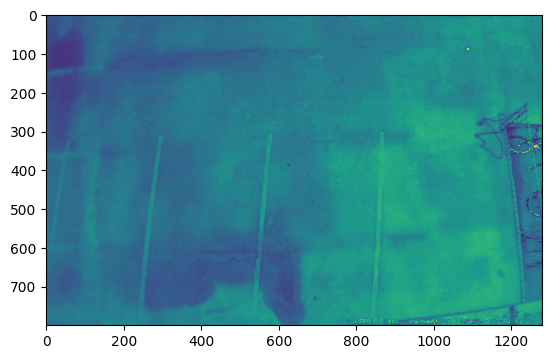

In [6]:
# Matriz de fondo
a = 5.5 # Para configurar
img_umb = np.asarray(cv2.subtract(img_mean, a*img_std), dtype=np.uint8)

plt.imshow(img_umb)

In [7]:
seg_1 = []
for k in range(1,500):
    path = str(k).zfill(4)
    img = cv2.imread(f"Lab-Mov/seq1/seq1/image-{path}.jpg", cv2.IMREAD_GRAYSCALE)
    img_dt = cv2.subtract(img, img_umb)
    _, img_tr = cv2.threshold(img_dt, 0, 255, cv2.THRESH_BINARY)
    seg_1.append(img_tr)

In [8]:
seg_2 = []
for k in range(1,400):
    path = str(k).zfill(4)
    img = cv2.imread(f"Lab-Mov/seq2/seq2/image-{path}.jpg", cv2.IMREAD_GRAYSCALE)
    img_dt = cv2.subtract(img, img_umb)
    _, img_tr = cv2.threshold(img_dt, 0, 255, cv2.THRESH_BINARY)
    seg_2.append(img_tr)

In [9]:
seg_3 = []
for k in range(1,175):
    path = str(k).zfill(4)
    img = cv2.imread(f"Lab-Mov/seq3/seq3/image-{path}.jpg", cv2.IMREAD_GRAYSCALE)
    img_dt = cv2.subtract(img, img_umb)
    _, img_tr = cv2.threshold(img_dt, 0, 255, cv2.THRESH_BINARY)
    seg_3.append(img_tr)

[]

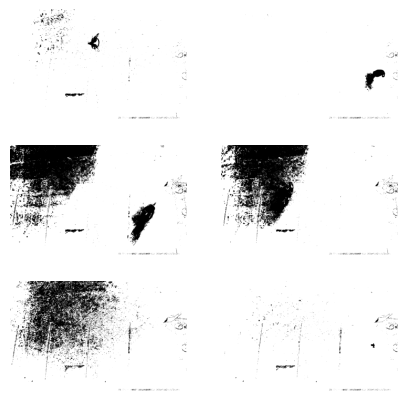

In [10]:
fig, axs = plt.subplots(3, 2, figsize =(5, 5))
axs[0, 0].imshow(seg_1[13], cmap="gray")
axs[0, 0].axis("off")
axs[0, 1].imshow(seg_1[205], cmap="gray")
axs[0, 1].axis("off")

axs[1, 0].imshow(seg_2[77], cmap="gray")
axs[1, 0].axis("off")
axs[1, 1].imshow(seg_2[290], cmap="gray")
axs[1, 1].axis("off")

axs[2, 0].imshow(seg_3[70], cmap="gray")
axs[2, 0].axis("off")
axs[2, 1].imshow(seg_3[165], cmap="gray")
axs[2, 1].axis("off")

plt.plot()

### Item 3

In [ ]:
'''
hist: img(binaria) -> hist_row, hist_column

'''
def hist(img):
    hist_row = []
    hist_column = []

    # primero histograma por fila
    for i in range(img.shape[0]):
        value = 0
        for j in range(img.shape[1]):
            if img[i, j] == 255:
                value += 1
        hist_row.append(value)

    # luego por columna
    for j in range(img.shape[1]):
        value = 0
        for i in range(img.shape[0]):
            if img[i, j] == 255:
                value += 1
        hist_column.append(value)

    return hist_row, hist_column

Ocupando la función anterior, se calculan los histogramas de las imágenes y se procesan para calcular el centro del `blob`

In [ ]:
hist_row, hist_column = hist(img)

# Funciona con SOLO UN blob
umbral = 20
i_min = 0
i_max = 0
for i, value in enumerate(hist_row):
    if value >= umbral:
        i_min = i
    if i_min != 0 and value <= umbral:
        i_max = i
i_c = (i_max + i_min)//2


j_min = 0
j_max = 0
for j, value in enumerate(hist_column):
    if value >= umbral:
        j_min = j
    if j_min != 0 and value <= umbral:
        j_max = j
j_c = (j_max + j_min)//2

### Item 4

### Item 5

# Parte 2

## Item 6

Clonar repositorio y compilar

In [11]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  81% (1680/2058)
Updating files:  82% (1688/2058)
Updating files:  83% (1709/2058)
Updating files:  84% (1729/2058)
Updating files:  85% (1750/2058)
Updating files:  86% (1770/2058)
Updating files:  87% (1791/2058)
Updating files:  88% (1812/2058)
Updating files:  89% (1832/2058)
Updating files:  90% (1853/2058)
Updating files:  91% (1873/2058)
Updating files:  92% (1894/2058)
Updating files:  93% (1914/2058)
Updating files:  94% (1935/2058)
Updating files:  95% (1956/2058)
Updating files:  96% (1976/2058)
Updating files:  97% (1997/2058)
Updating files:  98% (2017/2058)
Updating files:  99% (2038/2058)
Updating files: 100% (2058/2058)
Updating files: 100% (2058/2058), done.


In [12]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

c:\Users\lesli\OneDrive\Documents\GitHub\EL5206-Labs\Lab3\darknet


'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

**Descarga de pesos de la red** <br>
YOLOv4 ha sido entrenada con la base de datos COCO, que contiene 80 clases. Se descargarán los pesos de la red pre-entrenada.

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

**Funciones auxiliares para mostrar detecciones en las imágenes procesadas**

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

**Detección sobre una imagen de ejemplo**

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/eagle.jpg

**Visualización de Detecciones**

In [ ]:
# show image using our helper function
imShow('predictions.jpg')